# Plots timeseries

2019-12-11 09:35:12 

Fig 1: NNI timeseries of temperature and salinity, including ARGO sal and OISST temp  
Fig 12: NNI timeseries, with IPO, ITF strength


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plots-timeseries" data-toc-modified-id="Plots-timeseries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plots timeseries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#NNI" data-toc-modified-id="NNI-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NNI</a></span><ul class="toc-item"><li><span><a href="#ORCA" data-toc-modified-id="ORCA-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>ORCA</a></span></li><li><span><a href="#ARGO" data-toc-modified-id="ARGO-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>ARGO</a></span></li></ul></li><li><span><a href="#OISST" data-toc-modified-id="OISST-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OISST</a></span><ul class="toc-item"><li><span><a href="#Some-correlation-for-validation" data-toc-modified-id="Some-correlation-for-validation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Some correlation for validation</a></span></li></ul></li><li><span><a href="#ITF" data-toc-modified-id="ITF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ITF</a></span></li><li><span><a href="#Climate-Indices" data-toc-modified-id="Climate-Indices-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Climate Indices</a></span></li></ul></li><li><span><a href="#Detect-events" data-toc-modified-id="Detect-events-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Detect events</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Figure-3:-NNI-temp-&amp;-sal" data-toc-modified-id="Figure-3:-NNI-temp-&amp;-sal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Figure 3: NNI temp &amp; sal</a></span></li><li><span><a href="#Fig-11:-NNI-plus-ONI,-ITF" data-toc-modified-id="Fig-11:-NNI-plus-ONI,-ITF-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fig 11: NNI plus ONI, ITF</a></span><ul class="toc-item"><li><span><a href="#NNI---IPO/Nino" data-toc-modified-id="NNI---IPO/Nino-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>NNI - IPO/Nino</a></span></li><li><span><a href="#NNI---ITF-(not-used-in-paper)" data-toc-modified-id="NNI---ITF-(not-used-in-paper)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>NNI - ITF (not used in paper)</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Table-with-correlations" data-toc-modified-id="Table-with-correlations-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Table with correlations</a></span></li></ul></li></ul></li></ul></div>

In [1]:
#%matplotlib widget 
%matplotlib inline

import sys
sys.path.append("../")  # adds upper level to working directory
# sys.path.append("/home/sryan/Python/ORCA/NW_Atlantic/utils/")  # adds upper level to working directory

# somehow the other way does not work
from utils.orca_utilities import orca_index,deseason_month,deseason,anomaly,mean_LC_width,load_orca_EIO,crosscor,set_ylim_equal,deseason
from utils.mhw_detection import detect_events
from utils.xarray_utilities import mean_weighted,rolling_xcorr
from utils.plot_utils import calculate_ticks

import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
import cartopy.crs as ccrs
from scipy import signal
import string
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

################################
# path to save plots
plotsave = './plots/'

# Load data

## NNI

### ORCA

In [2]:
# load saved data sets
k003 = xr.open_dataset('../data/NNI_K003_22S_32S_110E_117W.nc')
k004 = xr.open_dataset('../data/NNI_K004_22S_32S_110E_117W.nc')
k005 = xr.open_dataset('../data/NNI_K005_22S_32S_110E_117W.nc')
k003f = xr.open_dataset('../data/NNI_noanom_K003_22S_32S_110E_117W.nc')
k004f = xr.open_dataset('../data/NNI_noanom_K004_22S_32S_110E_117W.nc')
k005f = xr.open_dataset('../data/NNI_noanom_K005_22S_32S_110E_117W.nc')





## Climate Indices

In [9]:
indices = xr.open_dataset('/vortex/clidex/data/obs/climate_indices/indices_noaa_psl_May_13_2020.nc')

# Plotting

## Fig 11: NNI plus ONI, ITF

### NNI - IPO/Nino

In [13]:
# add ipo phase as bar
# Create rectangle x coordinates
def add_ipo_bar(ax):
    cols = ['dodgerblue','indianred','dodgerblue','indianred']
    text = ['-IPO','+IPO','-IPO','']
    years = [1956,1977,1999,2013,2020]
    for i in range(len(years)-1):
        startTime = indices.sel(Month=slice(str(years[i]) + '-01-01',str(years[i]) + '-01-31'))['Month'].values
        endTime =  indices.sel(Month=slice(str(years[i+1]-1) + '-12-01',str(years[i+1]-1) + '-12-31'))['Month'].values#startTime + timedelta(seconds = 1)
        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start
        middle = (width/2)+start
        
        ulim = ax.get_ybound()[1]
        llim = ax.get_ybound()[1] - ax.get_ybound()[1]/6 
        rect = Rectangle((start[0], llim), width, ulim, color=cols[i],alpha=0.5)
        ax.text(middle,(ulim-llim)/2+llim,text[i],fontsize=6,fontweight='bold',verticalalignment='center',
               horizontalalignment='center')
        ax.add_patch(rect)


# function to plot panels
def plot_panel(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34'):
    
    anomaly(ax3,ds.time_counter.values,signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht')),[0,0])
    ax3.set_xlim('1956-01-01','2018-01-01')
    ax3.set_ylim(ylim1)
    ticks = calculate_ticks(ax3, 5,axis = 'y', round_to=round1, center=True)
    ax3.set_yticks(ticks)
    
    ax32 = ax3.twinx()
    ax32.plot(indices['Month'].values,indices[index].rolling(Month=8,center=True).mean(),color='gray',alpha=0.8)
    ax32.set_ylim(ylim2)
    cor = stats.pearsonr(signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht').rolling(time_counter=12,center=True).mean().dropna(dim='time_counter')),
                indices[index].sel(Month=slice('1958-01-01','2016-12-31')).rolling(Month=12,center=True).mean().dropna(dim='Month')) 
#     if cor[0]<=0: ax32.invert_yaxis()
    ax32.invert_yaxis()
    ticks = calculate_ticks(ax32, 5,axis = 'y', round_to=round2, center=True)
    ax32.set_yticks(ticks)
    ax32.set_ylabel(index)
    # show correlation as text
    ax3.text(0.03, 0.83,'r='+str(np.round(cor[0],2)), transform=ax3.transAxes, 
                    size=8, weight='bold')
    ax32.spines['right'].set_color('gray')
    ax32.yaxis.label.set_color('gray')
    ax32.tick_params(axis='y', colors='gray')
#     ax32.set_xticklabels('')

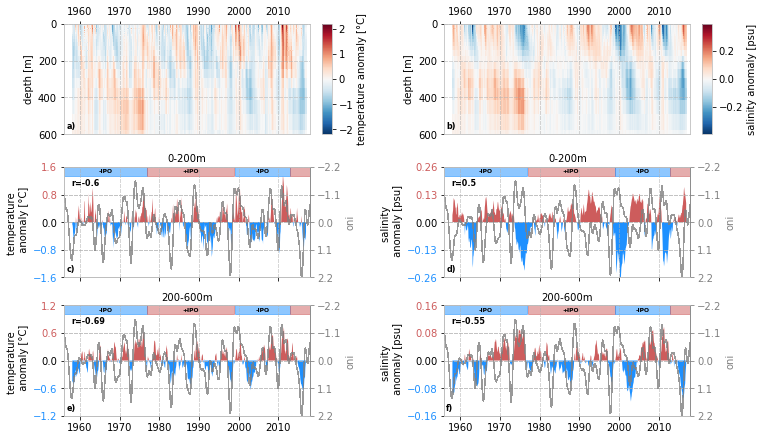

In [14]:
########## Figure 12 ###############

plt.rcParams.update({'font.size':10})
# plotting
fig2 = plt.figure(figsize=(10.5,6),constrained_layout=True)
widths = [0.5,0.5]
heights = [1,1,1]
grid = fig2.add_gridspec(ncols=2, nrows=3, width_ratios=widths,
                          height_ratios=heights,hspace=0.02)

# temperature
ax1 = fig2.add_subplot(grid[0, 0])
k003['votemper'].plot(ax=ax1,y='deptht',yincrease=False,cbar_kwargs={"label": 'temperature anomaly [\N{DEGREE SIGN}C]'})
# anomaly(ax1)
ax1.xaxis.tick_top()    
ax1.xaxis.set_label_position('top') 

# salinity
ax2 = fig2.add_subplot(grid[0, 1])
k003['vosaline'].plot(ax=ax2,y='deptht',yincrease=False,cbar_kwargs={"label": 'salinity anomaly [psu]'})
ax2.xaxis.tick_top()    
ax2.xaxis.set_label_position('top') 

# axis properties Hovmoeller
for ax in [ax1,ax2]:
    ax.grid()
    ax.set_ylim(600,0)
    ax.set_ylabel('depth [m]')
    ax.set_xlim('1956-01-01','2018-01-01')
    ax.set_xlabel('')
# ax2.set_xticklabels('')
# ylim for index
ylim2 = [-2,2]
index = 'oni'

# temp 200
ax3 = fig2.add_subplot(grid[1, 0])
ax3.set_title('0-200m',fontsize=10)
plot_panel(ax3,k003,'votemper',[0,200],indices,ylim1=[-1.4,1.4],ylim2=ylim2,round1=0.1,round2=0.1,index=index)
# ax3.set_xticklabels('')

# sal 200
ax4 = fig2.add_subplot(grid[1, 1],sharex=ax3)
ax4.set_title('0-200m')
plot_panel(ax4,k003,'vosaline',[0,200],indices,ylim1=[-0.25,0.25],ylim2=ylim2,round1=0.01,round2=0.1,index=index)

# temp 200-600
ax5 = fig2.add_subplot(grid[2, 0])
ax5.set_title('200-600m')
plot_panel(ax5,k003,'votemper',[200,600],indices,ylim1=[-1,1],ylim2=ylim2,round1=0.1,round2=0.1,index=index)

# sal 200-600
ax6 = fig2.add_subplot(grid[2, 1])
ax6.set_title('200-600m')
plot_panel(ax6,k003,'vosaline',[200,600],indices,ylim1=[-0.15,0.15],ylim2=ylim2,round1=0.01,round2=0.1,index=index)
# plot_panel(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34')

# ax3.spines['right'].set_visible(False)
# ax3.yaxis.grid() # vertical lines
# ax3.invert_yaxis()
# ax3.set_ylabel('IPO index')
ax4.set_xticklabels('')
for ax in [ax3,ax5]: ax.set_ylabel('temperature \n  anomaly [\N{DEGREE SIGN}C]')
for ax in [ax4,ax6]: ax.set_ylabel('salinity \n anomaly [psu]')
# color labels
for ax in [ax3,ax4,ax5,ax6]:
    colors=['indianred','dodgerblue']
    for i,tick in zip(range(len(ax.yaxis.get_major_ticks())),ax.yaxis.get_major_ticks()):
        if i < int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[1]) #set the color property
        elif i > int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[0]) #set the color property
            
    # add ipo phase as bar
    add_ipo_bar(ax); 
    
# add panel labels
for ax,i in zip([ax1,ax2,ax3,ax4,ax5,ax6],range(6)) :
    ax.text(0.008, 0.05, string.ascii_lowercase[i]+')', transform=ax.transAxes, 
                size=8, weight='bold')
    
# save figure    
# finished_plot(fig2,'/climodes/data4/sryan/plots_rev/main_figs/Fig11_NNI_2layers_'+index+'.png')